# Assignment 4
## Isabelle (Izzy) Southon, 300597453

The aim of this assignment is to develop a machine learning model to predict the house
prices using information in file data.csv. The description about the data is given in file
description.pdf

This is supervised learning, as we are given labeled training examples. This is a regression task, we are asked to predict a value based on multiple features.

### Taking a look at data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('data.csv')
data.head()

,id,price,lotSize,age,landValue,livingArea,pctCollege,bedrooms,fireplaces,bathrooms,rooms,heating,fuel,sewer,waterfront,newConstruction,centralAir
0,1,132500,0.09,42.0,50000,906,35,2,1,1.0,5,electric,electric,septic,No,No,No
1,2,181115,0.92,0.0,22300,1953,51,3,0,2.5,6,hot water/steam,gas,septic,No,No,No
2,3,109000,0.19,133.0,7300,1944,51,4,1,1.0,8,hot water/steam,gas,public/commercial,No,No,No
3,4,155000,0.41,13.0,18700,1944,51,3,1,1.5,5,hot air,gas,septic,No,No,No
4,5,86060,0.11,0.0,15000,840,51,2,0,1.0,3,NaN,gas,public/commercial,No,Yes,Yes


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1728 non-null   int64  
 1   price            1728 non-null   int64  
 2   lotSize          1728 non-null   float64
 3   age              1556 non-null   float64
 4   landValue        1728 non-null   int64  
 5   livingArea       1728 non-null   int64  
 6   pctCollege       1728 non-null   int64  
 7   bedrooms         1728 non-null   int64  
 8   fireplaces       1728 non-null   int64  
 9   bathrooms        1728 non-null   float64
 10  rooms            1728 non-null   int64  
 11  heating          1642 non-null   object 
 12  fuel             1728 non-null   object 
 13  sewer            1728 non-null   object 
 14  waterfront       1728 non-null   object 
 15  newConstruction  1728 non-null   object 
 16  centralAir       1728 non-null   object 
dtypes: float64(3),

In [4]:
data.describe()

,id,price,lotSize,age,landValue,livingArea,pctCollege,bedrooms,fireplaces,bathrooms,rooms
count,1728.000000,1728.000000,1728.000000,1556.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000
mean,864.500000,211966.705440,0.500214,27.999357,34557.187500,1754.975694,55.567708,3.154514,0.601852,1.900174,7.041667
std,498.974949,98441.391015,0.698680,29.374891,35021.168056,619.935553,10.333581,0.817351,0.556102,0.658352,2.316453
min,1.000000,5000.000000,0.000000,0.000000,200.000000,616.000000,20.000000,1.000000,0.000000,0.000000,2.000000
25%,432.750000,145000.000000,0.170000,13.000000,15100.000000,1300.000000,52.000000,3.000000,0.000000,1.500000,5.000000
50%,864.500000,189900.000000,0.370000,19.000000,25000.000000,1634.500000,57.000000,3.000000,1.000000,2.000000,7.000000
75%,1296.250000,259000.000000,0.540000,34.000000,40200.000000,2137.750000,64.000000,4.000000,1.000000,2.500000,8.250000
max,1728.000000,775000.000000,12.200000,225.000000,412600.000000,5228.000000,82.000000,7.000000,4.000000,4.500000,12.000000


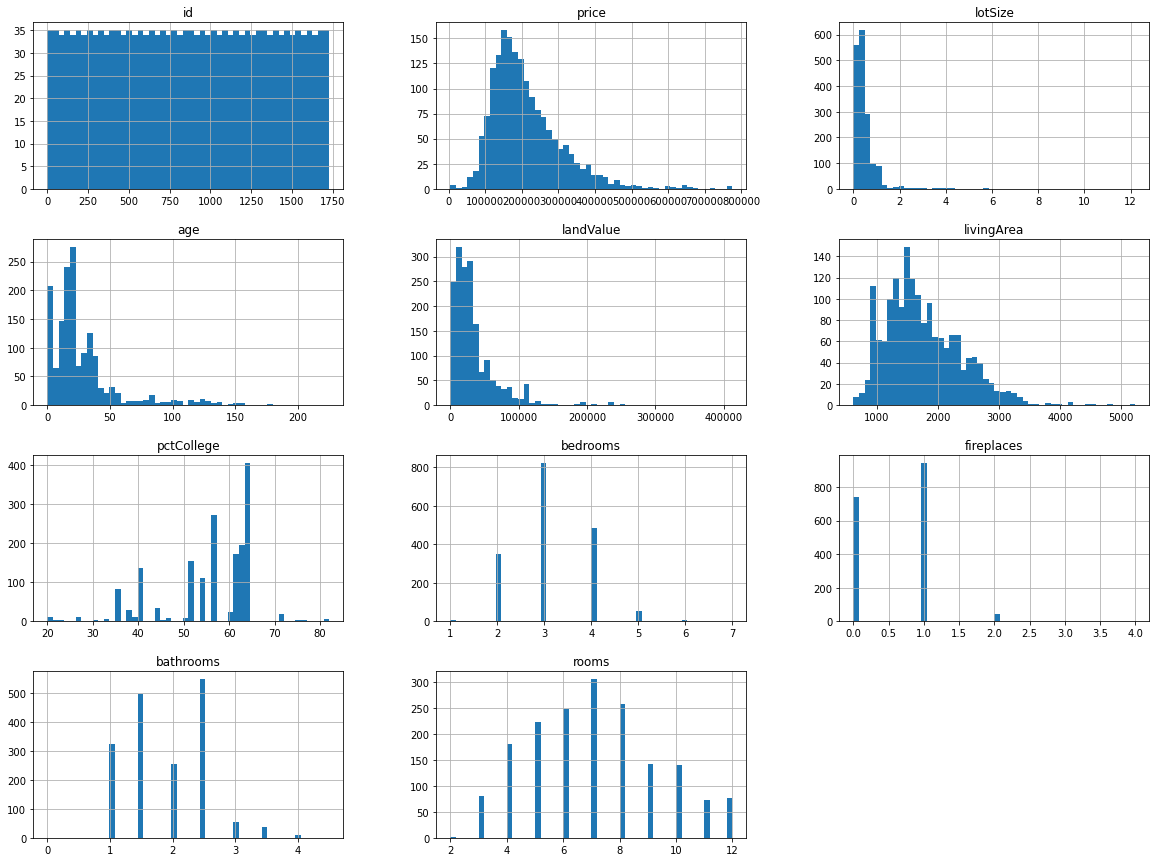

In [5]:
data.hist(bins=50, figsize=(20,15));
fig = plt.gcf()
fig.savefig('hist.pdf', bbox_inches='tight');

## Load the dataset, determine the target column, remove irrelevant variables (if any), and use function train_test_split with random_state=1 to split the data into two sets: a training set (80%) and a test set (20%)

In [6]:
# we are predicting house price so price is our target column 
# also leaving all variables in the dataset
target_column = 'price'
data[target_column].value_counts()

150000    21
225000    21
120000    21
155000    19
195000    18
          ..
470000     1
164400     1
362710     1
381500     1
111300     1
Name: price, Length: 751, dtype: int64

In [7]:
data["heating"].value_counts()

hot air            1070
electric            286
hot water/steam     286
Name: heating, dtype: int64

In [8]:
data["fuel"].value_counts()

gas         1197
electric     315
oil          216
Name: fuel, dtype: int64

In [9]:
data["sewer"].value_counts()

public/commercial    1213
septic                503
none                   12
Name: sewer, dtype: int64

In [10]:
data["newConstruction"].value_counts()

No     1647
Yes      81
Name: newConstruction, dtype: int64

In [11]:
data["centralAir"].value_counts()

No     1093
Yes     635
Name: centralAir, dtype: int64

In [12]:
# one hot encoding multiple columns as they are categorical 
# List of column names to one-hot encode
columns_to_encode = ['heating', 'fuel', 'sewer', 'waterfront', 'newConstruction', 'centralAir']

# Assuming 'data' is your DataFrame
data = pd.get_dummies(data, columns=columns_to_encode, prefix=columns_to_encode)
data.head()

,id,price,lotSize,age,landValue,livingArea,pctCollege,bedrooms,fireplaces,bathrooms,...,fuel_oil,sewer_none,sewer_public/commercial,sewer_septic,waterfront_No,waterfront_Yes,newConstruction_No,newConstruction_Yes,centralAir_No,centralAir_Yes
0,1,132500,0.09,42.0,50000,906,35,2,1,1.0,...,0,0,0,1,1,0,1,0,1,0
1,2,181115,0.92,0.0,22300,1953,51,3,0,2.5,...,0,0,0,1,1,0,1,0,1,0
2,3,109000,0.19,133.0,7300,1944,51,4,1,1.0,...,0,0,1,0,1,0,1,0,1,0
3,4,155000,0.41,13.0,18700,1944,51,3,1,1.5,...,0,0,0,1,1,0,1,0,1,0
4,5,86060,0.11,0.0,15000,840,51,2,0,1.0,...,0,0,1,0,1,0,0,1,0,1


In [37]:
corr_matrix['price'].sort_values(ascending=False)

price                      1.000000
livingArea                 0.725237
bathrooms                  0.620147
landValue                  0.568658
rooms                      0.536715
bedrooms                   0.390732
fireplaces                 0.390084
centralAir_Yes             0.346531
id                         0.236027
fuel_gas                   0.233857
heating_hot air            0.208195
pctCollege                 0.202097
lotSize                    0.167117
newConstruction_Yes        0.156612
waterfront_Yes             0.129889
sewer_public/commercial    0.067631
sewer_none                 0.027479
heating_hot water/steam   -0.040960
sewer_septic              -0.072902
fuel_oil                  -0.076550
waterfront_No             -0.129889
newConstruction_No        -0.156612
age                       -0.213129
fuel_electric             -0.214752
heating_electric          -0.216797
centralAir_No             -0.346531
Name: price, dtype: float64

In [38]:
from sklearn.model_selection import train_test_split

# train_set, test_set = train_test_split(data, test_size=0.2, random_state=1, stratify=data[target_column])
train_set, test_set = train_test_split(data, test_size=0.2, random_state=1)

In [14]:
train_set.head()

,id,price,lotSize,age,landValue,livingArea,pctCollege,bedrooms,fireplaces,bathrooms,...,fuel_oil,sewer_none,sewer_public/commercial,sewer_septic,waterfront_No,waterfront_Yes,newConstruction_No,newConstruction_Yes,centralAir_No,centralAir_Yes
1579,1580,320000,0.55,33.0,50300,2212,64,4,1,2.5,...,0,0,1,0,1,0,1,0,0,1
634,635,150000,0.19,123.0,103000,934,57,2,0,1.0,...,0,0,1,0,1,0,1,0,1,0
299,300,191500,0.88,33.0,35900,2576,64,4,1,2.5,...,0,0,1,0,1,0,1,0,1,0
1085,1086,120000,0.19,16.0,3400,1480,54,2,1,1.5,...,0,0,1,0,1,0,1,0,1,0
1659,1660,169000,0.19,15.0,6800,1301,40,3,0,1.5,...,0,0,1,0,1,0,1,0,1,0


In [15]:
test_set.head()

,id,price,lotSize,age,landValue,livingArea,pctCollege,bedrooms,fireplaces,bathrooms,...,fuel_oil,sewer_none,sewer_public/commercial,sewer_septic,waterfront_No,waterfront_Yes,newConstruction_No,newConstruction_Yes,centralAir_No,centralAir_Yes
1233,1234,375000,0.12,69.0,195000,1452,62,3,1,2.0,...,0,0,1,0,1,0,1,0,1,0
592,593,280000,0.09,82.0,83000,1560,57,2,0,1.0,...,0,0,1,0,1,0,1,0,1,0
625,626,449000,1.00,20.0,124800,3457,57,3,2,2.5,...,0,0,0,1,1,0,1,0,0,1
1546,1547,162900,0.12,20.0,18200,1314,64,2,1,1.5,...,0,0,1,0,1,0,1,0,1,0
730,731,184020,0.40,34.0,59000,1544,57,3,0,2.5,...,0,0,1,0,1,0,1,0,1,0


## Explore the training set to gain insights

In [16]:
data = train_set.copy()

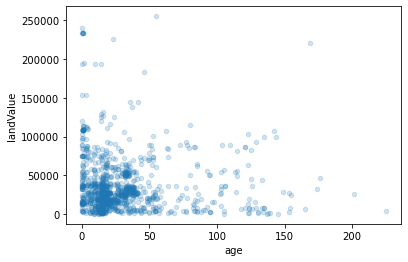

In [17]:
data.plot(kind="scatter", x="age", y="landValue", alpha=0.2);

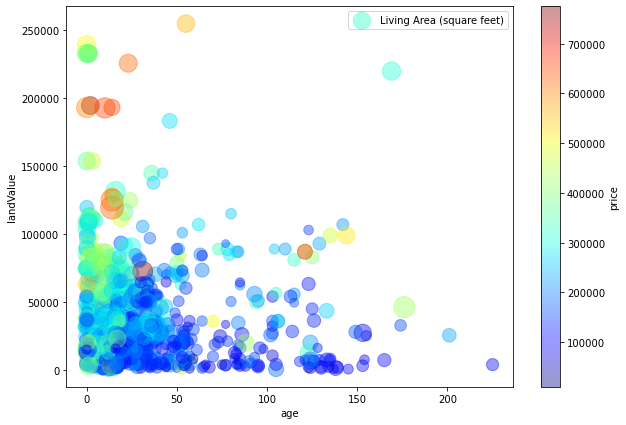

In [18]:
data.plot(kind="scatter", x="age", y="landValue", alpha=0.4,
             s=data["livingArea"]/10, label="Living Area (square feet)", figsize=(10,7),
             c="price", cmap=plt.get_cmap("jet"), colorbar=True, sharex=False)
plt.legend();

A house around 0-140 years old is cheaper, has a smaller living area and has less land value. 

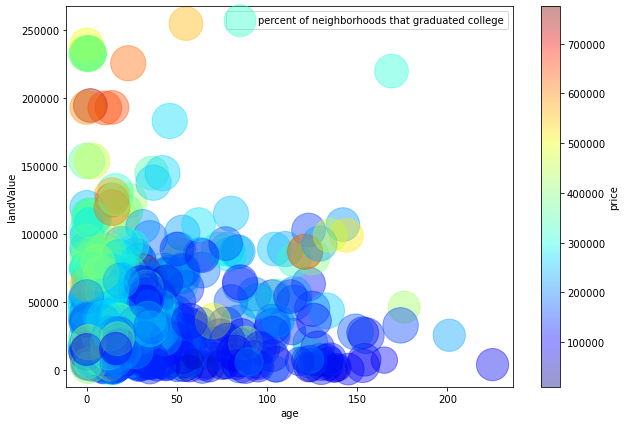

In [19]:
data.plot(kind="scatter", x="age", y="landValue", alpha=0.4,
             s=data["pctCollege"]*20, label="percent of neighborhoods that graduated college", figsize=(10,7),
             c="price", cmap=plt.get_cmap("jet"), colorbar=True, sharex=False)
plt.legend();

Percent of neighbours that graduated college seems to be unrelated to price, land value and age of the house (years).

In [20]:
corr_matrix = data.corr()
corr_matrix

,id,price,lotSize,age,landValue,livingArea,pctCollege,bedrooms,fireplaces,bathrooms,...,fuel_oil,sewer_none,sewer_public/commercial,sewer_septic,waterfront_No,waterfront_Yes,newConstruction_No,newConstruction_Yes,centralAir_No,centralAir_Yes
id,1.000000,0.236027,-0.053549,-0.013558,0.060146,0.053948,-0.044267,0.022728,0.032437,0.013077,...,-0.063657,-0.084638,0.101091,-0.086802,0.035267,-0.035267,-0.028904,0.028904,-0.012059,0.012059
price,0.236027,1.000000,0.167117,-0.213129,0.568658,0.725237,0.202097,0.390732,0.390084,0.620147,...,-0.076550,0.027479,0.067631,-0.072902,-0.129889,0.129889,-0.156612,0.156612,-0.346531,0.346531
lotSize,-0.053549,0.167117,1.000000,-0.025463,0.073561,0.161049,-0.030900,0.110124,0.090890,0.079828,...,0.226529,0.061852,-0.355915,0.347246,0.002395,-0.002395,0.015286,-0.015286,0.006869,-0.006869
age,-0.013558,-0.213129,-0.025463,1.000000,-0.049996,-0.177320,-0.062547,0.035718,-0.168137,-0.371824,...,0.286236,-0.050557,-0.092753,0.101621,-0.009493,0.009493,0.199194,-0.199194,0.281166,-0.281166
landValue,0.060146,0.568658,0.073561,-0.049996,1.000000,0.447973,0.262390,0.209869,0.217137,0.307534,...,-0.099780,-0.000859,0.166144,-0.167037,-0.070717,0.070717,-0.263011,0.263011,-0.264466,0.264466
livingArea,0.053948,0.725237,0.161049,-0.177320,0.447973,1.000000,0.230171,0.638461,0.472505,0.719227,...,-0.065176,0.044534,0.039966,-0.048070,0.004611,-0.004611,-0.252545,0.252545,-0.298017,0.298017
pctCollege,-0.044267,0.202097,-0.030900,-0.062547,0.262390,0.230171,1.000000,0.159252,0.245477,0.194830,...,-0.162965,0.000687,0.231079,-0.232653,0.124067,-0.124067,0.050692,-0.050692,-0.253601,0.253601
bedrooms,0.022728,0.390732,0.110124,0.035718,0.209869,0.638461,0.159252,1.000000,0.280079,0.448570,...,-0.003984,0.029124,-0.052211,0.047403,0.095182,-0.095182,-0.120997,0.120997,-0.078997,0.078997
fireplaces,0.032437,0.390084,0.090890,-0.168137,0.217137,0.472505,0.245477,0.280079,1.000000,0.436579,...,-0.095791,-0.006615,0.061213,-0.060431,0.003003,-0.003003,-0.052359,0.052359,-0.281899,0.281899
bathrooms,0.013077,0.620147,0.079828,-0.371824,0.307534,0.719227,0.194830,0.448570,0.436579,1.000000,...,-0.152490,0.027247,0.117618,-0.123162,0.013495,-0.013495,-0.209216,0.209216,-0.346292,0.346292


In [21]:
corr_matrix["price"].sort_values(ascending=False) # price tends to increase when the living area in sq ft increases (strong positive correlation)

price                      1.000000
livingArea                 0.725237
bathrooms                  0.620147
landValue                  0.568658
rooms                      0.536715
bedrooms                   0.390732
fireplaces                 0.390084
centralAir_Yes             0.346531
id                         0.236027
fuel_gas                   0.233857
heating_hot air            0.208195
pctCollege                 0.202097
lotSize                    0.167117
newConstruction_Yes        0.156612
waterfront_Yes             0.129889
sewer_public/commercial    0.067631
sewer_none                 0.027479
heating_hot water/steam   -0.040960
sewer_septic              -0.072902
fuel_oil                  -0.076550
waterfront_No             -0.129889
newConstruction_No        -0.156612
age                       -0.213129
fuel_electric             -0.214752
heating_electric          -0.216797
centralAir_No             -0.346531
Name: price, dtype: float64

In [22]:
X_train = train_set.drop("price", axis=1) # drop labels for the training set
y_train = train_set["price"].copy() # save the labels

In [23]:
X_train.head(5)

,id,lotSize,age,landValue,livingArea,pctCollege,bedrooms,fireplaces,bathrooms,rooms,...,fuel_oil,sewer_none,sewer_public/commercial,sewer_septic,waterfront_No,waterfront_Yes,newConstruction_No,newConstruction_Yes,centralAir_No,centralAir_Yes
1579,1580,0.55,33.0,50300,2212,64,4,1,2.5,9,...,0,0,1,0,1,0,1,0,0,1
634,635,0.19,123.0,103000,934,57,2,0,1.0,7,...,0,0,1,0,1,0,1,0,1,0
299,300,0.88,33.0,35900,2576,64,4,1,2.5,10,...,0,0,1,0,1,0,1,0,1,0
1085,1086,0.19,16.0,3400,1480,54,2,1,1.5,6,...,0,0,1,0,1,0,1,0,1,0
1659,1660,0.19,15.0,6800,1301,40,3,0,1.5,4,...,0,0,1,0,1,0,1,0,1,0


In [24]:
y_train.head(5)

1579    320000
634     150000
299     191500
1085    120000
1659    169000
Name: price, dtype: int64

In [25]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [26]:
# impute the median for missing data
data_transform_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler()),
])

In [27]:
X_train_prepared = data_transform_pipeline.fit_transform(X_train)

In [28]:
X_train_prepared

array([[ 1.44533773,  0.04965702,  0.19344901, ..., -0.20930037,
        -1.28553147,  1.28553147],
       [-0.46069596, -0.43552284,  3.35897822, ..., -0.20930037,
         0.77788838, -0.77788838],
       [-1.13637986,  0.49440522,  0.19344901, ..., -0.20930037,
         0.77788838, -0.77788838],
       ...,
       [ 0.47114274,  0.30572416, -0.36931174, ..., -0.20930037,
        -1.28553147,  1.28553147],
       [-1.26546574, -0.48943172, -0.40448429, ..., -0.20930037,
         0.77788838, -0.77788838],
       [ 0.4005489 , -0.07163795,  0.29896665, ..., -0.20930037,
        -1.28553147,  1.28553147]])

In [29]:
X_train_prepared.shape

(1382, 25)

## Select one machine learning model, train it, optimise it (e.g., add pre-processing transformers, perform hyper-parameter tuning, etc.), and estimate the performance of the model.

In [30]:
# Linear regression model 
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train_prepared, y_train);

In [31]:
some_data = X_train.iloc[:5]
some_labels = y_train.iloc[:5]
some_data_prepared = data_transform_pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [312128.20043144 164528.46768427 253309.46454889 170026.07002442
 169479.27203153]


In [32]:
print("Labels:", list(some_labels))

Labels: [320000, 150000, 191500, 120000, 169000]


## Use root mean square error (RMSE) as the evaluation metric.

In [33]:
from sklearn.metrics import mean_squared_error

y_train_predicted = lin_reg.predict(X_train_prepared)
lin_mse = mean_squared_error(y_train, y_train_predicted)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

53762.83377738549

In [45]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(random_state=0)
forest_reg.fit(X_train_prepared, y_train);

y_train_predicted = forest_reg.predict(X_train_prepared)
forest_mse = mean_squared_error(y_train, y_train_predicted)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

19676.516595896548

In [42]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(forest_reg, X_train_prepared, y_train,
                         scoring="neg_mean_squared_error", cv=3)
forest_rmse_scores = np.sqrt(-scores)
print("Mean:", forest_rmse_scores.mean(), "; Standard deviation:", forest_rmse_scores.std())

Mean: 54180.24458430949 ; Standard deviation: 2955.325141956578


In [43]:
scores = cross_val_score(lin_reg, X_train_prepared, y_train,
                         scoring="neg_mean_squared_error", cv=3)
lin_rmse_scores = np.sqrt(-scores)
print("Mean:", lin_rmse_scores.mean(), "; Standard deviation:", lin_rmse_scores.std())

Mean: 55003.22121165614 ; Standard deviation: 941.3576060314442


In [46]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 9 (3×3) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6]},
    # then try 6 (1x2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=0)

# train across 3 folds, that's a total of (9+6)*3=45 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=3,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(X_train_prepared, y_train);

In [47]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [48]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30, random_state=0)

In [49]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

66808.00423009077 {'max_features': 2, 'n_estimators': 3}
57658.45870486046 {'max_features': 2, 'n_estimators': 10}
56141.152930608805 {'max_features': 2, 'n_estimators': 30}
67643.86005206019 {'max_features': 4, 'n_estimators': 3}
58088.2622358611 {'max_features': 4, 'n_estimators': 10}
54838.07374643767 {'max_features': 4, 'n_estimators': 30}
62757.39756663073 {'max_features': 6, 'n_estimators': 3}
55496.141274521346 {'max_features': 6, 'n_estimators': 10}
54069.74183921866 {'max_features': 6, 'n_estimators': 30}
68093.4985480385 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
57147.03356138884 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
62466.45814432527 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
55447.72145343226 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}
65906.8297955812 {'bootstrap': False, 'max_features': 4, 'n_estimators': 3}
57704.30631299993 {'bootstrap': False, 'max_features': 4, 'n_estimators': 10}


In [50]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.012918,0.003058,0.003279,0.001768,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-4.163633e+09,-5.383524e+09,-3.842772e+09,-4.463309e+09,6.637438e+08,13,-1.108891e+09,-1.071524e+09,-1.325866e+09,-1.168760e+09,1.121330e+08
1,0.022634,0.002665,0.002528,0.000372,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-3.251180e+09,-3.748402e+09,-2.973912e+09,-3.324498e+09,3.204066e+08,7,-5.829940e+08,-5.674598e+08,-6.789621e+08,-6.098053e+08,4.931074e+07
2,0.044324,0.000995,0.004206,0.000056,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-2.982257e+09,-3.654734e+09,-2.818497e+09,-3.151829e+09,3.618374e+08,5,-4.444124e+08,-4.430053e+08,-5.105901e+08,-4.660026e+08,3.153335e+07
3,0.005702,0.000143,0.000878,0.000009,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-4.115556e+09,-5.327567e+09,-4.283952e+09,-4.575692e+09,5.360823e+08,14,-1.051633e+09,-1.164310e+09,-1.180773e+09,-1.132239e+09,5.739143e+07
4,0.016707,0.000169,0.001729,0.000028,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-3.143176e+09,-3.927791e+09,-3.051771e+09,-3.374246e+09,3.931903e+08,9,-5.421484e+08,-5.417065e+08,-6.157533e+08,-5.665361e+08,3.480231e+07
5,0.066793,0.009256,0.005829,0.000528,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-2.819848e+09,-3.515532e+09,-2.686264e+09,-3.007214e+09,3.635483e+08,2,-4.297536e+08,-4.243325e+08,-4.736682e+08,-4.425848e+08,2.209046e+07
6,0.007412,0.000312,0.000994,0.000075,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-4.083234e+09,-3.661087e+09,-4.071153e+09,-3.938491e+09,1.962165e+08,11,-1.126466e+09,-1.070857e+09,-1.070680e+09,-1.089334e+09,2.625595e+07
7,0.019326,0.000382,0.001746,0.000033,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-3.078101e+09,-3.211485e+09,-2.949879e+09,-3.079822e+09,1.068074e+08,4,-5.284696e+08,-5.290482e+08,-6.228223e+08,-5.601134e+08,4.434252e+07
8,0.056220,0.000327,0.004132,0.000057,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-2.905350e+09,-3.166466e+09,-2.698795e+09,-2.923537e+09,1.913584e+08,1,-4.136243e+08,-4.147150e+08,-4.709680e+08,-4.331024e+08,2.677869e+07
9,0.005118,0.000126,0.000909,0.000004,2,3,False,"{'bootstrap': False, 'max_features': 2, 'n_est...",-4.759757e+09,-5.018706e+09,-4.131711e+09,-4.636725e+09,3.724179e+08,15,-0.000000e+00,-9.892629e+03,-0.000000e+00,-3.297543e+03,4.663430e+03


## Test the final model on the test set and report the RMSE and at least two other evaluation metrics (e.g., mean absolute percentage error (MAPE), R2-score, etc.)

In [51]:
final_model = grid_search.best_estimator_

X_test = test_set.drop("price", axis=1)
y_test = test_set["price"].copy()

X_test_prepared = data_transform_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

20073.269311832762

In [52]:
y_test_predicted = lin_reg.predict(X_test_prepared)
lin_mse = mean_squared_error(y_test, y_test_predicted)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

52617.223040985176

## Include a discussion at the end of your notebook (about what you have learned, difficulties, what has worked and not worked, future directions, etc.). 

Had trouble making price the target column. A lot of my model has not worked. I have learned that this assignment will take time. Difficulties included choosing the right model for the regression task at hand. Future directions are to do better on the project and put more time into it. 